Aim
- Gain a better understanding of Kmeans Clustering and K-nearest Neighbhor algorithm
- Apply PCA
- Understand how applying PCA affects the classification of data using machine learning models: Kmeans Clustering, K-nearest Neighbhor, Neural Networkds, SVM

"Might want to check dbscan and heiracharl clustering"

In [27]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import  cross_val_score
from sklearn.neural_network import MLPClassifier
import time

In [2]:
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
digits.data.shape

(1797, 64)

Four Images of Each Class in the Dataset


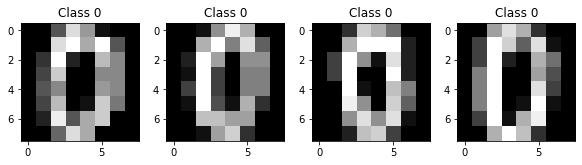

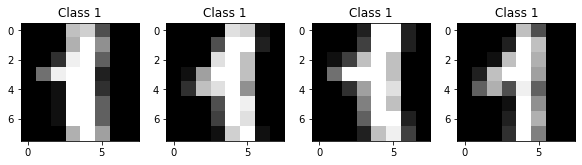

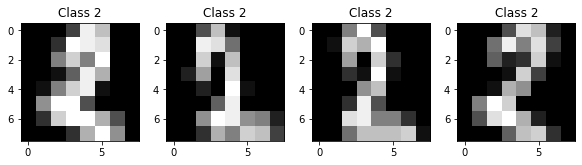

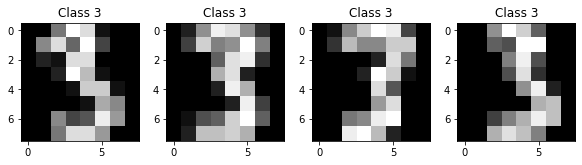

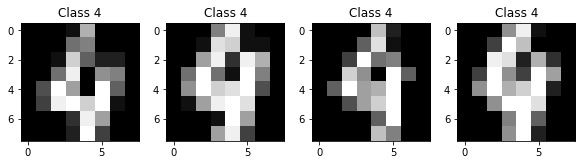

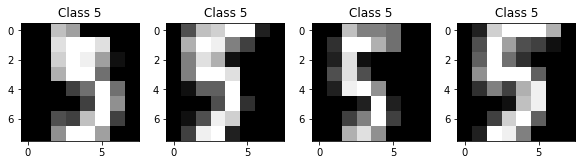

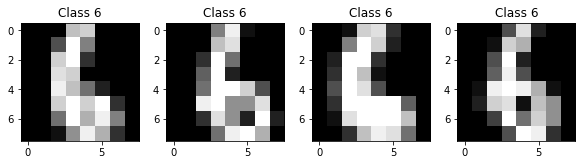

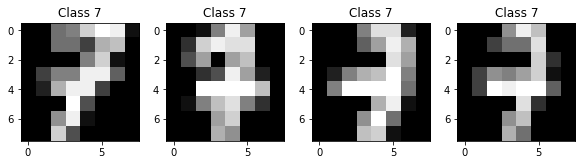

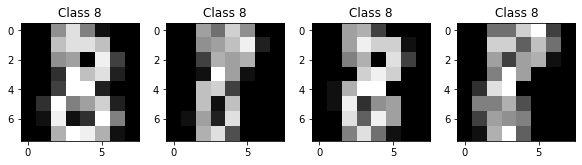

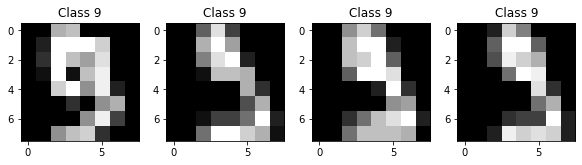

In [5]:
print("Four Images of Each Class in the Dataset")
for x in range(10):
    fig=plt.figure(figsize=(10, 10))
    y = 0
    while(y<4):
        classish = np.where(digits.target==x)[0]
        samplex = digits.data[classish[y]]
        fig.add_subplot(4,4,y+1)
        title = "Class " + str(digits.target[classish[y]])
        plt.title(title)
        plt.imshow(digits.images[classish[y]], cmap='gray')
        y+=1
    plt.show()

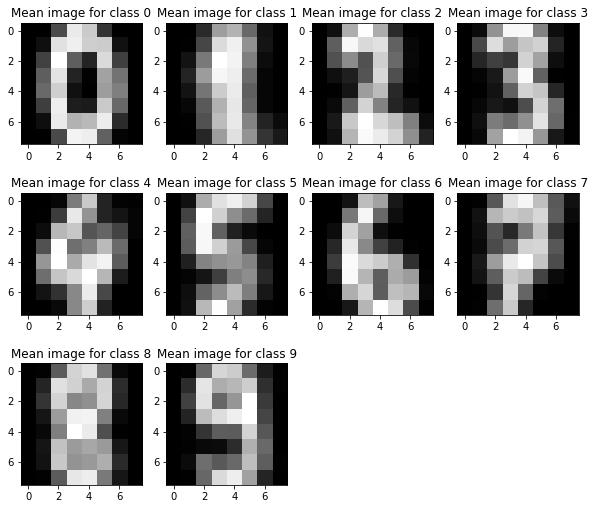

In [6]:
M = []
for x in range(10):
    classish = np.where(digits.target==x)[0]
    arrays = []
    for i in range(len(classish)):
        arrays.append(digits.data[classish[i]])
    arrays = np.array(arrays)
    average = np.sum(arrays, axis =0)/len(arrays)
    M.append(average)
fig=plt.figure(figsize=(10, 12))
y=0
while(y<10):
    samplex = M[y]
    fig.add_subplot(4,4,y+1)
    plt.imshow(np.reshape(samplex, (8, 8)), cmap='gray')
    title = "Mean image for class " + str(y)
    plt.title(title)
    y+=1
    #plt.pause(0.05)
plt.show()

In [7]:
digits.data = StandardScaler().fit_transform(digits.data)

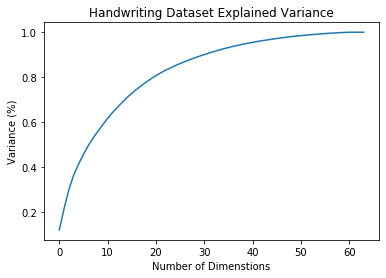

In [8]:
pca = PCA().fit(digits.data)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Dimenstions')
plt.ylabel('Variance (%)') #for each component
plt.title('Handwriting Dataset Explained Variance')
plt.show()

In [9]:
## We want to get the number of dimensions that covers up 95% of the variance of the dataset
values = np.cumsum(pca.explained_variance_ratio_)
cumsumvariance = np.cumsum(pca.explained_variance_ratio_)
cumsumvariance[digits.data.shape[1]-np.sum([values > 0.95])]

0.9507791125066465

In [10]:
## we can see with 39 dimensions we coverup 95% of the variance
dimension = digits.data.shape[1]-np.sum([values > 0.95])
dimension

39

In [11]:
pca = PCA(n_components=dimension)
pcomponents = pca.fit_transform(digits.data)

In [12]:
## I will also use 2 dimenstions, to help visualize the data in 2d
pca = PCA(n_components=2)
pcomponents_2 = pca.fit_transform(digits.data)

C:\Users\Shivamm Gupta\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
C:\Users\Shivamm Gupta\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


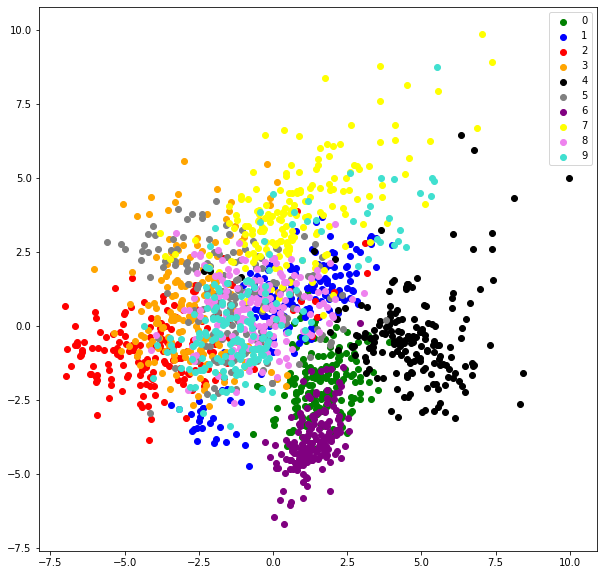

In [13]:
plt.figure(figsize= (10,10))
colors = ["green", "blue", "red", "orange", "black", "grey", "purple", "yellow", "violet", "turquoise"]
for x in range(10):
    classish = np.where(digits.target==x)[0]
    firstdimension = np.array(pcomponents_2[:,0])
    seconddimension = np.array(pcomponents_2[:,1])
    firstdimension = firstdimension[[classish]]
    seconddimension = seconddimension[[classish]]
    plt.scatter(firstdimension,seconddimension, c = colors[x])
plt.legend(np.arange(0,10))

In [14]:
def pca_images(data, kmeans, actualdata):
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(data[:, 0], data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='white', zorder=10)
    plt.title('K-means clustering (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [15]:
## kmeans clustering vs knn neighbour - in 2d space
from sklearn.cluster import KMeans
kmeans_1 = KMeans(n_clusters=10, init=pcomponents_2[0:10]).fit(pcomponents_2)


#firstoneofeachclass
X = []
for x in range(10):
    classish = np.where(digits.target==x)[0]
    samplex = pcomponents_2[classish[0]]
    X.append(pcomponents_2[classish[0]])
X = np.array(X)
kmeans_2 = KMeans(n_clusters=10, init=X).fit(pcomponents_2)


import random
X = []
x = False
while x!= True:
    r=random.randint(0,np.shape(pcomponents_2)[0])
    if r not in X:
        X.append(r)
    if(len(X) ==10):
        x=True
X = pcomponents_2[X]    
X = np.array(X)

kmeans_3 = KMeans(n_clusters=10, init=X).fit(pcomponents_2)

C:\Users\Shivamm Gupta\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\cluster\k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
C:\Users\Shivamm Gupta\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\cluster\k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
C:\Users\Shivamm Gupta\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\cluster\k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Initial Clusters: first ten in the data set


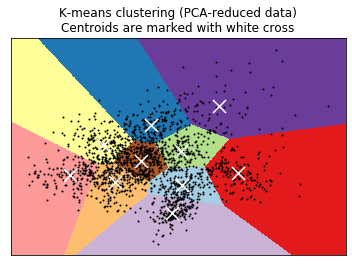

Inital Clusters: first digit of each class


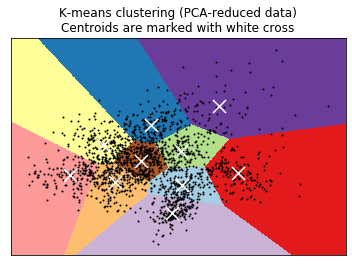

Inital Clusters: random ten digits


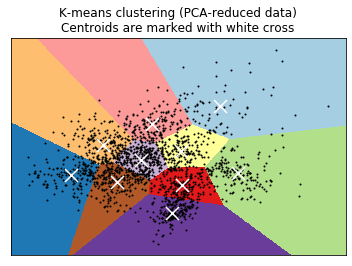

In [16]:
print("Initial Clusters: first ten in the data set")
pca_images(pcomponents_2, kmeans_1, digits.data)
print("Inital Clusters: first digit of each class")
pca_images(pcomponents_2, kmeans_2, digits.data)
print("Inital Clusters: random ten digits")
pca_images(pcomponents_2, kmeans_3, digits.data)

We can see from the above how the the cetroids to a very large degree stay the same. Given that the k-means clustering algorithm convereges; it seems to shows that irrespective of the inital clusters, the centroids stay more or less the same. This would imply that, the accuracy should also not change by too much either, since the labels would be the same as the centroids dont change by a lot. I will show how the cluster centers don't change much with the real data as well

Initial Clusters: first ten in the data set


C:\Users\Shivamm Gupta\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\cluster\k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


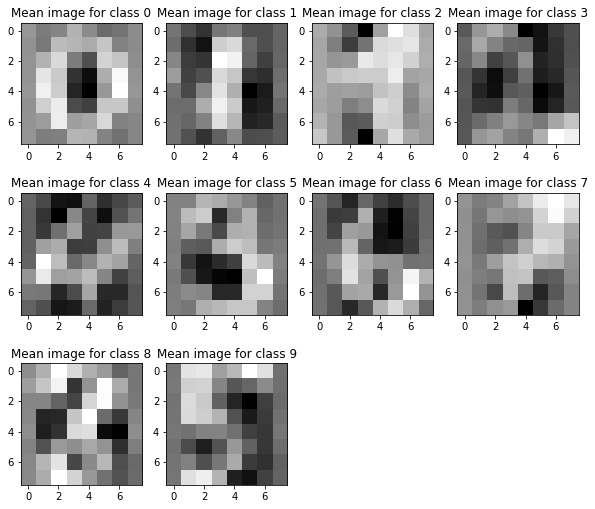

Inital Clusters: first digit of each class


C:\Users\Shivamm Gupta\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\cluster\k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


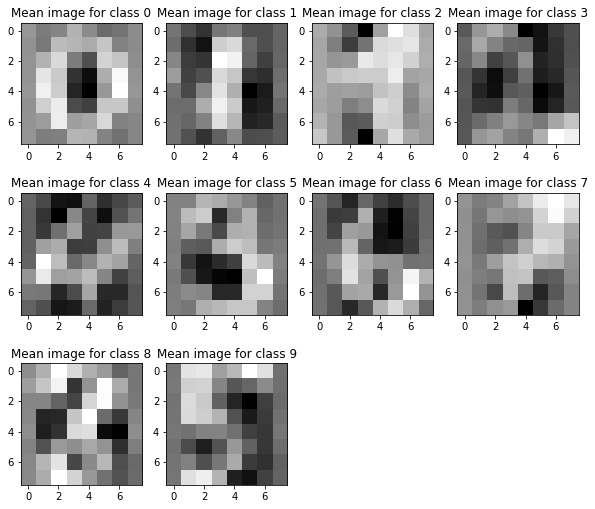

C:\Users\Shivamm Gupta\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\cluster\k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Inital Clusters: random ten digits


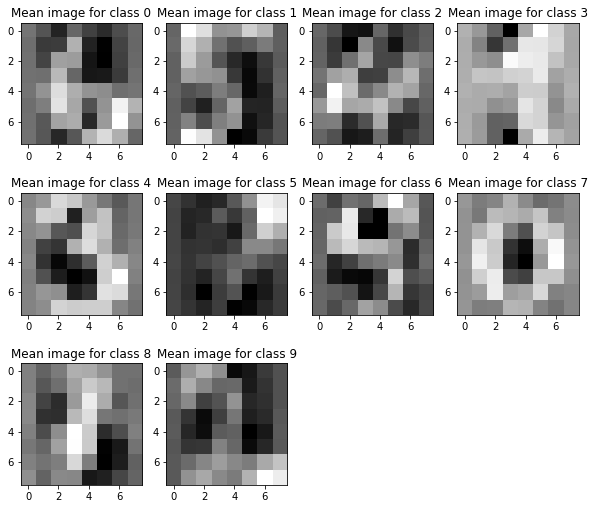

Inital Clusters: None


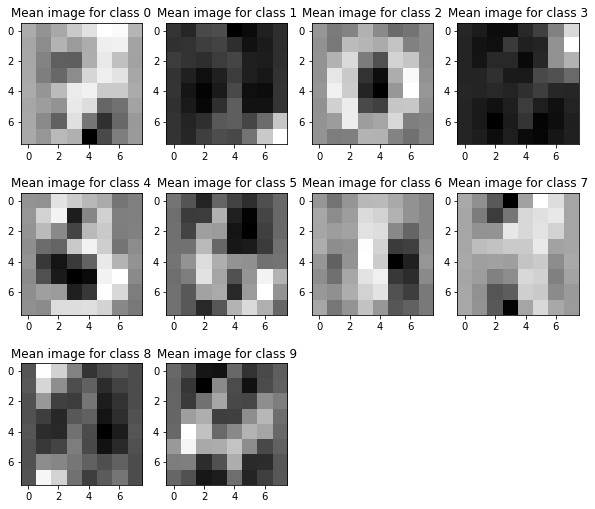

In [17]:
print("Initial Clusters: first ten in the data set")
kmeans_1 = KMeans(n_clusters=10, init = digits.data[0:10], max_iter = 1000).fit(digits.data)
fig=plt.figure(figsize=(10, 12))
y=0
while(y<10):
    samplex = kmeans_1.cluster_centers_[y]
    fig.add_subplot(4,4,y+1)
    plt.imshow(np.reshape(samplex, (8, 8)), cmap='gray')
    title = "Mean image for class " + str(y)
    plt.title(title)
    y+=1
    #plt.pause(0.05)
plt.show()


print("Inital Clusters: first digit of each class")
#firstoneofeachclass
X = []
for x in range(10):
    classish = np.where(digits.target==x)[0]
    samplex = digits.data[classish[0]]
    X.append(digits.data[classish[0]])
first = np.array(X)
kmeans_2 = KMeans(n_clusters=10, init=first, max_iter = 1000 ).fit(digits.data)


fig=plt.figure(figsize=(10, 12))
y=0
while(y<10):
    samplex = kmeans_2.cluster_centers_[y]
    fig.add_subplot(4,4,y+1)
    plt.imshow(np.reshape(samplex, (8, 8)), cmap='gray')
    title = "Mean image for class " + str(y)
    plt.title(title)
    y+=1
    #plt.pause(0.05)
plt.show()


import random
X = []
x = False
while x!= True:
    r=random.randint(0,np.shape(digits.data)[0])
    if r not in X:
        X.append(r)
    if(len(X) ==10):
        x=True
X = digits.data[X]    
X = np.array(X)

kmeans_3 = KMeans(n_clusters=10, init=X, max_iter = 1000).fit(digits.data)
print("Inital Clusters: random ten digits")

fig=plt.figure(figsize=(10, 12))
y=0
while(y<10):
    samplex = kmeans_3.cluster_centers_[y]
    fig.add_subplot(4,4,y+1)
    plt.imshow(np.reshape(samplex, (8, 8)), cmap='gray')
    title = "Mean image for class " + str(y)
    plt.title(title)
    y+=1
    #plt.pause(0.05)
plt.show()
print("Inital Clusters: None")
kmeans_3 = KMeans(n_clusters=10, max_iter = 1000).fit(digits.data)


fig=plt.figure(figsize=(10, 12))
y=0
while(y<10):
    samplex = kmeans_3.cluster_centers_[y]
    fig.add_subplot(4,4,y+1)
    plt.imshow(np.reshape(samplex, (8, 8)), cmap='gray')
    title = "Mean image for class " + str(y)
    plt.title(title)
    y+=1
    #plt.pause(0.05)
plt.show()



Even though the order is different for each of the labels, what can be noticed is the above confirms the above: the cluster centers to a very large degree stay the same. Because the cluster centers are to a large degree the same, there should not be a huge variation in the accuracy levels since the labels would be very similar in each implementation of the algorithm with different initial clusters centers. 

In [18]:
X_trn, X_test, y_trn, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)
X_trn_39, X_test_39, y_trn_39, y_test_39 = train_test_split(pcomponents,digits.target, test_size = 0.2)
X_trn_2, X_test_2, y_trn_2, y_test_2 = train_test_split(pcomponents_2,digits.target, test_size = 0.2)

In [19]:
def kmeans_cluster(initial, X_train, X_test, y_train, y_test):
    k_means = KMeans(n_clusters = 10, init = initial, max_iter = 1000).fit(X_train)
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train, y_train)
    predictions = neigh.predict(k_means.cluster_centers_)
    dictionary = {}
    for x in range(len(predictions)):
        dictionary[x] = predictions[x]
    return accuracy_score(list(map(dictionary.get,k_means.predict(X_test))), y_test)

In [20]:
kmeans_cluster(X_trn[0:10],X_trn, X_test, y_trn, y_test)

C:\Users\Shivamm Gupta\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\cluster\k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


0.6444444444444445

In [21]:
kmeans_cluster(first,X_trn, X_test, y_trn, y_test)

C:\Users\Shivamm Gupta\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\cluster\k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


0.7027777777777777

In [22]:
kmeans_cluster(X,X_trn, X_test, y_trn, y_test)

C:\Users\Shivamm Gupta\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\cluster\k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


0.6222222222222222

The above to a large degree confirms the argument above. The above shows how apply different inital cluster centers do not affect the acccuracy of the classification of the k-means clustering algorithm on the same dataset. Which shows how, the k-means clustering algorithm classification becomes consistent on the same dataset as long as they converge. The convergence allows similar cluster centers, which in turn reflects very similar labels, making the classification consistent. 

Now I will be comparing how machine learning models do with respect to data in 3 different dimenstions: 2,39,64

In [23]:
def kmeans_cluster(X,y):
    X_trn, X_test, y_trn, y_test = train_test_split(X, y, test_size = 0.2)
    k_means = KMeans(n_clusters = 10, max_iter = 1000).fit(X_trn)
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X_trn, y_trn)
    predictions = neigh.predict(k_means.cluster_centers_)
    dictionary = {}
    for x in range(len(predictions)):
        dictionary[x] = predictions[x]
    return accuracy_score(list(map(dictionary.get,k_means.predict(X_test))), y_test)

def knearest(X, y):
    neigh = KNeighborsClassifier(n_neighbors=5)
    cv_scores = cross_val_score(neigh, X, y, cv=5)
    return np.mean(cv_scores)
def SVM(X, y):
    clf = SVC()
    cv_scores = cross_val_score(clf, X, y, cv=5)
    return np.mean(cv_scores)
def neuralnets(X,y):
    mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic',
                    learning_rate_init=.1)
    cv_scores = cross_val_score(mlp, X, y, cv=5)
    return np.mean(cv_scores)

In [24]:
models = [kmeans_cluster, knearest, SVM, neuralnets]
data = [digits.data, pcomponents, pcomponents_2]
modelsname= ["kmeans", "knearest", "svm", "neuralnetworks"]
dimensions = ["64", "39", "2"]

In [28]:
accuracy = []
times = []
for x in models:
    for y in range(len(data)):
        now = time.time()
        accuracy.append(x(data[y],digits.target))
        times.append(time.time()-now)

C:\Users\Shivamm Gupta\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shivamm Gupta\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shivamm Gupta\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

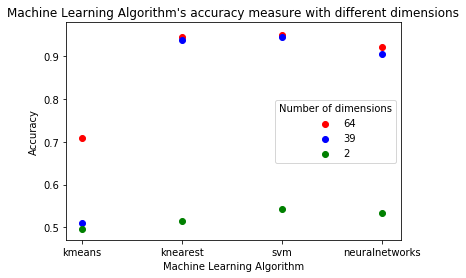

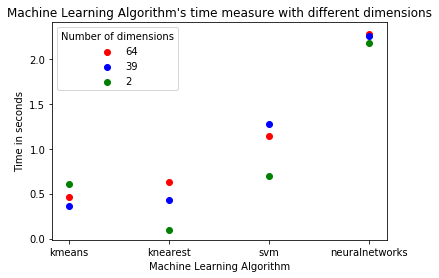

In [32]:
plt.figure()
y = 0
for x in modelsname:
    plt.scatter(x, accuracy[y+0], c = "red")
    plt.scatter(x, accuracy[y+1], c = "blue")
    plt.scatter(x, accuracy[y+2], c = "green")
    y+=3
plt.legend(["64", "39", "2"], title = "Number of dimensions")
plt.title("Machine Learning Algorithm's accuracy measure with different dimensions")
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy")
plt.show()

plt.figure()
y = 0
for x in modelsname:
    plt.scatter(x, times[y+0], c = "red")
    plt.scatter(x, times[y+1], c = "blue")
    plt.scatter(x, times[y+2], c = "green")
    y+=3
plt.legend(["64", "39", "2"], title = "Number of dimensions")
plt.title("Machine Learning Algorithm's time measure with different dimensions")
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Time in seconds")
plt.show()


One thing that can be noticed with each machine learning algorithm is that using the actual data in 64 dimensions which covers 100% of the variance is more accurate than using the other two. However using 39 dimensions which covers 95% of the variance in the actual data also shows very high accuracy (matching the one in 64 dimensions), which goes to show how using PCA in 95 percentile is fairly accurate. This can be of great help because when working with a more complex dataset which has more dimensions, and if there is a fairly great distance between the dimension that covers 95% of the variance and the actual dataset dimension using PCA can help in various ways. Firstly when working with fewer dimensions the computation power reduces fairly. Secondly, as it can be seen from the above, it is fairly acccurate. Third, it has the ability to cut out noise, it was not that apparent in this project, which has the ability to improve the accuracy (even more than using the actual dataset). With using 2 dimensions covering about 34% of the variance of the actual data is not enough to cover enough data to make it accurate. From the above it can be seen how using PCA can be useful.

In terms of the machine learning models, it can clearly be seen how the kmeans clustering algorithm performed the worse. The reason being is because the model aims to just partiion the data into x cluster centers; and in the process and account for nuances and noise in the data, which reflects in the acccuracy. The other three, can be seen perform well, the main reason for this is because their algorithm helps cover more nuances and account for noise better (in particular will compare the difference between kmeans and kclustering). For example the number 7 and the number 1 does not have much difference. Kmeans clustering would not be able to differentiate the 1s and 7s that look very closely alike; however, knearest neighbhors would be able to since they can l